In [17]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  
import os
coastline= coastline.to_crs(epsg=4326)  

In [18]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')


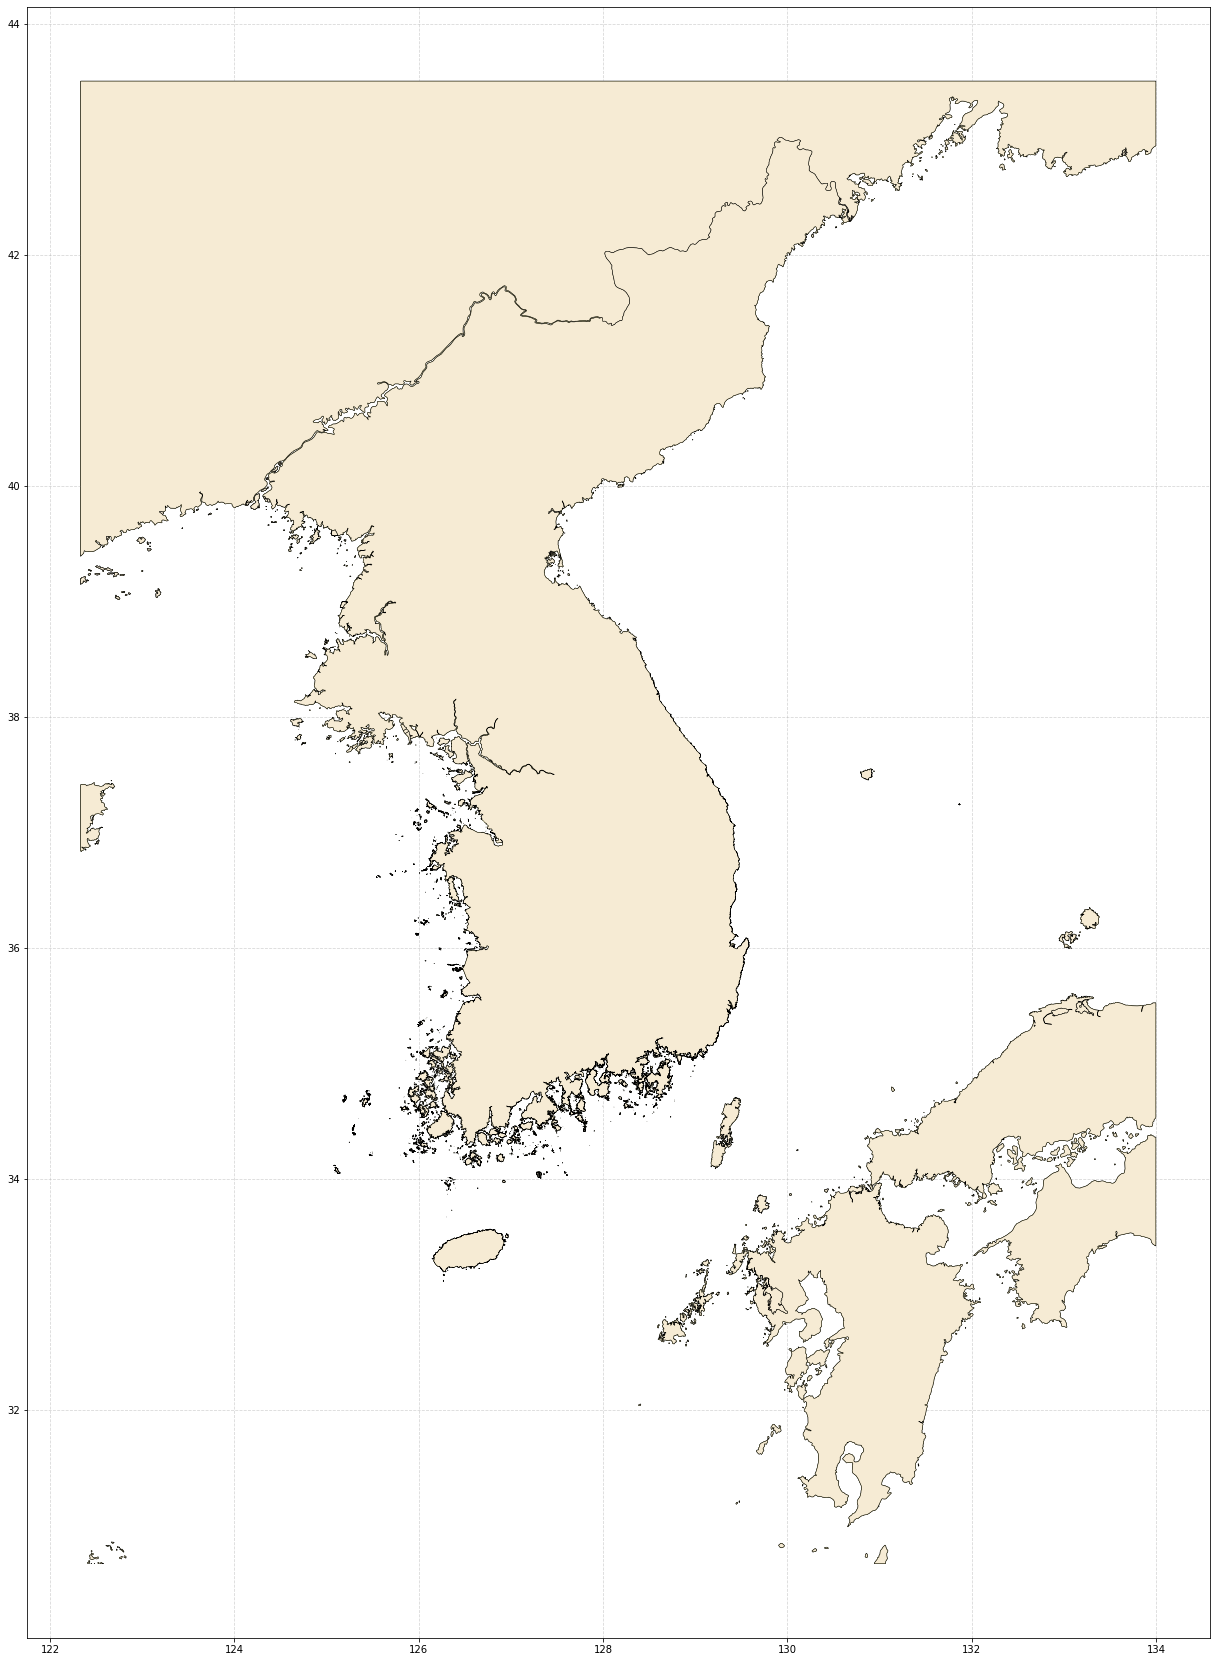

In [19]:
plot_map(coastline)

In [3]:
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')

1순위 2순위 정해서 네이밍

1순위

In [ ]:
fpath = './result/ex14/processing/'
flist = glob.glob('./result/ex14/processing/**/*', recursive=True)
for fname in flist:
    if '면허어업' in fname:
        os.rename(fname, fpath+'1.'+fname.split('\\')[-1])
    elif '_1kmE' in fname:
        os.rename(fname, fpath+'2.'+fname.split('\\')[-1])
    elif 'vpass' in fname:
        os.rename(fname, fpath+'3.'+fname.split('\\')[-1])
    elif '어획량' in fname:
        os.rename(fname, fpath+'4.'+fname.split('\\')[-1])
    elif '어획실적' in fname:
        os.rename(fname, fpath+'5.'+fname.split('\\')[-1])
    elif '관리수면' in fname:
        os.rename(fname, fpath+'6.'+fname.split('\\')[-1])
    elif '경북' in fname:
        os.rename(fname, fpath+'7.'+fname.split('\\')[-1])
    elif '경북어항' in fname:
        os.rename(fname, fpath+'8.'+fname.split('\\')[-1])
    elif '어항구' in fname:
        os.rename(fname, fpath+'9.'+fname.split('\\')[-1])
    print(fname.split('\\')[-1])

In [16]:
flist = glob.glob('./result/ex14/overlay_2/**/*.shp', recursive=True)
print('1순위로 자릅니다',flist[0].split('\\')[-1])
try:
    object = gpd.read_file(flist[0], encoding='utf8')
    # object = object['geometry']
except Exception as e:
    # print(e, fname)
    object = gpd.read_file(flist[0], encoding='euckr')
object= object.to_crs(epsg=4326)
#유효성검사
# object = object[object.is_valid==True]
for fname in flist[1:]:
    print(fname.split('\\')[-1])
    try:
        data = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        data = gpd.read_file(fname, encoding='euckr')
    data= data.to_crs(epsg=4326)

    # data= data[data.is_valid==True]

    try:
        result2 = gpd.overlay(data, object,  how='difference')
    except Exception as e:
        # data = data.explode(ignore_index=True)
        # result2 = gpd.overlay(data, object,  how='difference')
        pass
    # plot_map(result2)
    # result2 = gpd.sjoin(object, FISH, how='inner', op='intersects')
    try:
        result2.to_file('./result/ex14/test_20220512/'+fname.split('\\')[-1], encoding='euckr')
    except Exception as e:
        print(e)
        pass

1순위로 자릅니다 2.면허어업_1kmE_D (1).shp
3.2021_경북_vpass3등급_rm.shp
Invalid field type <class 'bytes'>
4.2021_경북_어획량3등급_rm.shp
Invalid field type <class 'bytes'>
5.2021_경북_어획실적3등급_rm.shp
Invalid field type <class 'bytes'>
6.경북수산자원관리수면.shp
7.2021_경북_주요어종3등급_rm.shp
Invalid field type <class 'bytes'>
8.경북어항_211006_ATT_rm.shp
Invalid field type <class 'bytes'>
9.어항구_Mergev2_211006.shp
GDAL Error: Attempt to write non-polygon (LINESTRING) geometry to POLYGON type shapefile. 
 
 Failed to write record: {'id': '13', 'type': 'Feature', 'properties': {'ALIAS': None, 'BCODE': 0, 'BUFF_DIST': 0.0, 'Distance': 133, 'ET_ID': 0, 'FID_해저': 0, 'Id': 0, 'Layer': None, 'MNUM': '13800004794020020403UGA0000000006', 'NTFDATE': None, 'No': 2, 'PORT_NAME': None, 'REMARK': None, 'area': 0, 'coastal': '이용연안', 'f_name': None, 'kind': None, 'name': None, 'name_1': None, 'sgg': None, 'sido': None, '기능구': '어항구', '기준': None, '면적': 302, '비고': None, '이름': '저동항', '종류': '국가어항'}, 'geometry': {'type': 'GeometryCollection', 'geomet

In [14]:
for k in range(2):
    
    flist = glob.glob('./result/ex14/overlay_'+str(k)+'/**/*.shp', recursive=True)
    print(flist)
    print(str(k+1)+'순위로 자릅니다',flist[0].split('\\')[-1])
    try:
        object = gpd.read_file(flist[0], encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(flist[0], encoding='euckr')
    object= object.to_crs(epsg=4326)
    #유효성검사
    # object = object[object.is_valid==True]
    print("--------------------------- spatial index 여부 ------------------------------")
    
    if object.has_sindex ==False:
        print(object.has_sindex)
        index = object.sindex
    else:
        print(object.has_sindex)

    print("최종처리", object.has_sindex)
    for fname in flist[1:]:
        print(fname.split('\\')[-1])
        try:
            data = gpd.read_file(fname, encoding='utf8')
            # object = object['geometry']
        except Exception as e:
            # print(e, fname)
            data = gpd.read_file(fname, encoding='euckr')

        if data.has_sindex == False:
            print(data.has_sindex)
            index = data.sindex
        else:
            print(data.has_sindex)

        print("최종처리", data.has_sindex)
        #crs setting
        data= data.to_crs(epsg=4326)

        # data= data[data.is_valid==True]

        try:
            result2 = gpd.overlay(data, object,  how='difference')
        except Exception as e:
            # data = data.explode(ignore_index=True)
            # result2 = gpd.overlay(data, object,  how='difference')
            pass
        # plot_map(result2)
        # result2 = gpd.sjoin(object, FISH, how='inner', op='intersects')
        if not os.path.exists('./result/ex14/overlay_'+str(k+1)+'/'):
                os.makedirs('./result/ex14/overlay_'+str(k+1)+'/')
        try:
            result2.to_file('./result/ex14/overlay_'+str(k+1)+'/'+fname.split('\\')[-1], encoding='euckr')
        except Exception as e:
            result2.to_file('./result/ex14/overlay_'+str(k+1)+'/'+fname.split('\\')[-1], encoding='utf8')
            print(e)
            pass

['./result/ex14/overlay_0\\1.면허어업_디졸브.shp', './result/ex14/overlay_0\\2.면허어업_1kmE_D (1).shp', './result/ex14/overlay_0\\3.2021_경북_vpass3등급_rm.shp', './result/ex14/overlay_0\\4.2021_경북_어획량3등급_rm.shp', './result/ex14/overlay_0\\5.2021_경북_어획실적3등급_rm.shp', './result/ex14/overlay_0\\6.경북수산자원관리수면.shp', './result/ex14/overlay_0\\7.2021_경북_주요어종3등급_rm.shp', './result/ex14/overlay_0\\8.경북어항_211006_ATT_rm.shp', './result/ex14/overlay_0\\9.어항구_Mergev2_211006.shp']
1순위로 자릅니다 1.면허어업_디졸브.shp
--------------------------- spatial index 여부 ------------------------------
False
최종처리 True
2.면허어업_1kmE_D (1).shp
False
최종처리 True
3.2021_경북_vpass3등급_rm.shp
False
최종처리 True
4.2021_경북_어획량3등급_rm.shp
False
최종처리 True
5.2021_경북_어획실적3등급_rm.shp
False
최종처리 True
6.경북수산자원관리수면.shp
False
최종처리 True
7.2021_경북_주요어종3등급_rm.shp
False
최종처리 True
8.경북어항_211006_ATT_rm.shp
False
최종처리 True
9.어항구_Mergev2_211006.shp
False
최종처리 True
['./result/ex14/overlay_1\\2.면허어업_1kmE_D (1).shp', './result/ex14/overlay_1\\3.2021_경북_vpass3등급_rm.shp', './r

## 공간인덱스 생성